# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def plot_compare(ys, tau, x_scale=1, y_scale=1, figsize=(8, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for y in ys:
        means = np.cumsum(y*y_scale, dtype=np.float)
        means[tau:] = means[tau:] - means[:-tau]
        means = means[tau-1:] / tau
        x = np.arange(means.size) / x_scale
        ax.plot(x, means)
    ax.set_xlabel("Number of episodes, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()

def plot_means_and_stdevs(y, tau, x_scale=1, y_scale=1, figsize=(8, 5), 
                          color='dodgerblue', save=False):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    y = np.array(y) * y_scale

    means = np.cumsum(y, dtype=np.float)
    stdevs = np.cumsum(np.square(y), dtype=np.float)
    
    means[tau:] = means[tau:] - means[:-tau]
    means = means[tau-1:] / tau
    
    stdevs[tau:] = stdevs[tau:] - stdevs[:-tau]
    stdevs = stdevs[tau-1:] / tau - np.square(means)
    stdevs = np.sqrt(stdevs)
    
    lower = means - stdevs
    upper = means + stdevs
    
    x = np.arange(means.size) / x_scale
    
    ax.plot(x, means, color=color)
    ax.fill_between(x, lower, means, alpha=0.2, where=lower <= means, facecolor=color)
    ax.fill_between(x, upper, means, alpha=0.2, where=upper >= means, facecolor=color)
    
    ax.set_xlabel("Number of episodes, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()
    
    if save:
        fig.savefig('results/prosthetics.png', dpi=300, bbox_inches='tight')
        
def plot_histograms(r, agents=[0], num_episodes=50, figsize=(8, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for i, a in enumerate(agents):
        indices = np.where(r[:,0]==a)
        ax.hist(r[:,2][indices][-num_episodes:], bins=16, edgecolor='black', range=[-5, 5], 
                alpha=0.7, linewidth=1.5, label="Agent "+str(a))
        print ("Agent " + str(a) + " average reward:", np.mean(r[:,2][indices][-num_episodes:]))
        ax.set
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)
    ax.legend()

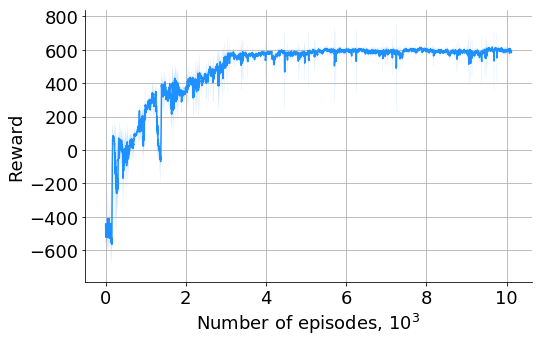

In [431]:
r = np.loadtxt('experiments/prosthetics/results/td3/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

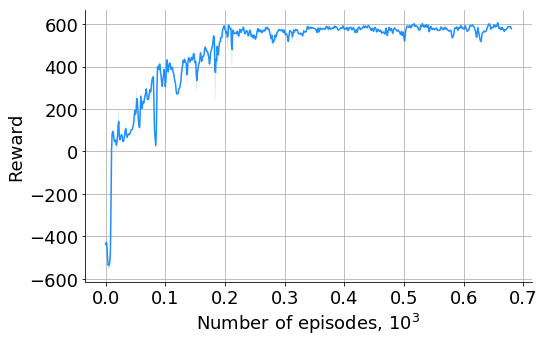

In [96]:
r = np.loadtxt('experiments/prosthetics/results/td3/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=2, x_scale=1000, y_scale=1, save=False)

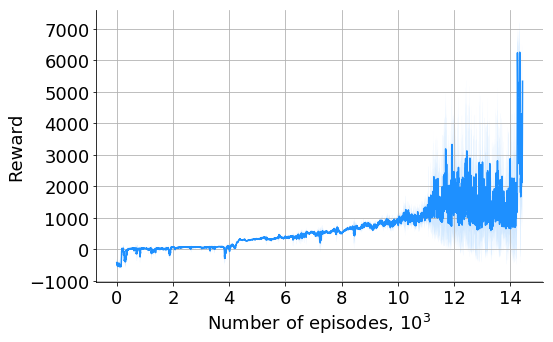

In [25]:
r = np.loadtxt('experiments/prosthetics/results/quantile_bending03/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

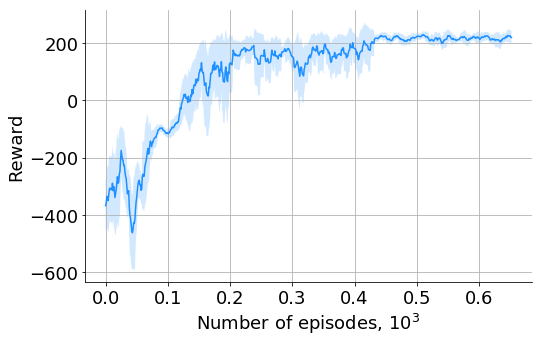

In [49]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=100, save=False)

Agent 0 average reward: 2.1672523897355234
Agent 1 average reward: 2.145582065652428
Agent 2 average reward: 2.2102785331780983
Agent 3 average reward: 2.1514741357272733


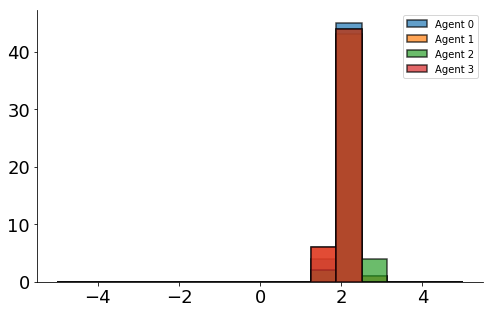

In [51]:
plot_histograms(r, [0, 1, 2, 3])

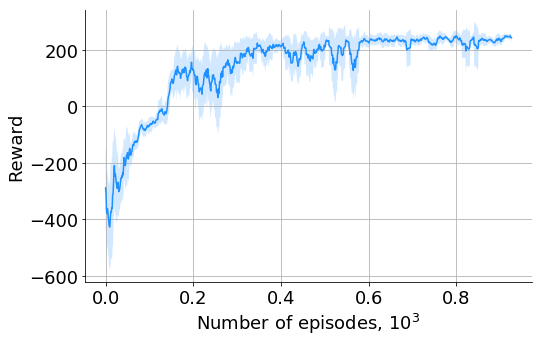

In [79]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=100, save=False)

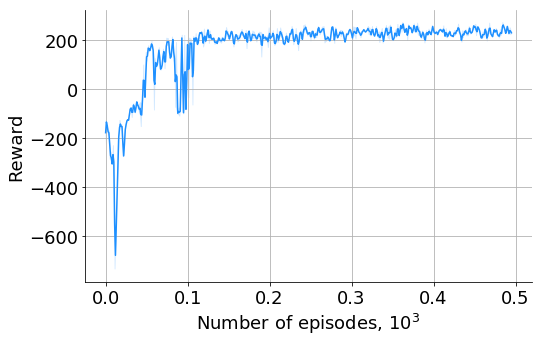

In [77]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=2, x_scale=1000, y_scale=100, save=False)

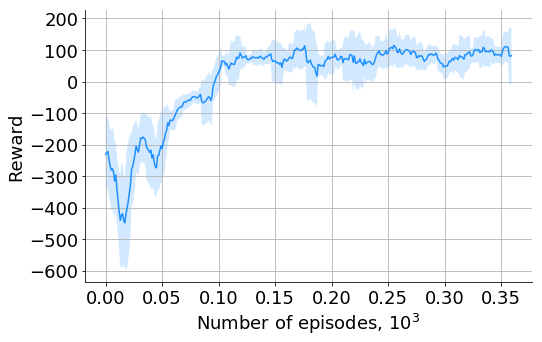

In [99]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=100, save=False)

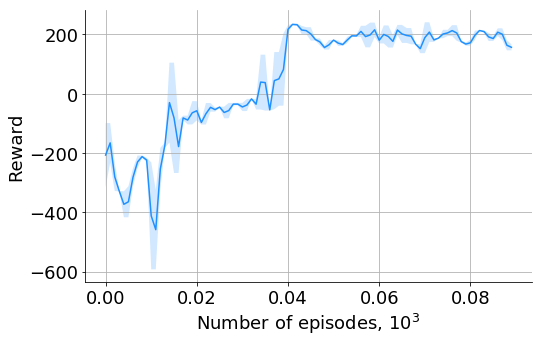

In [98]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=2, x_scale=1000, y_scale=100, save=False)

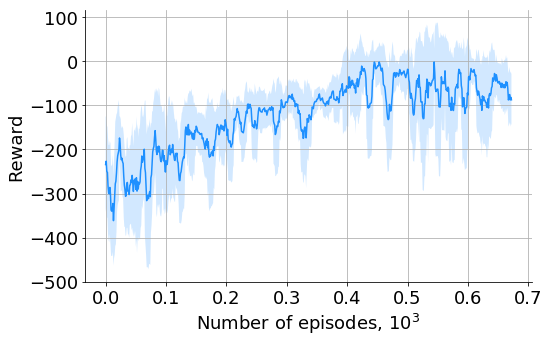

In [106]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=100, save=False)

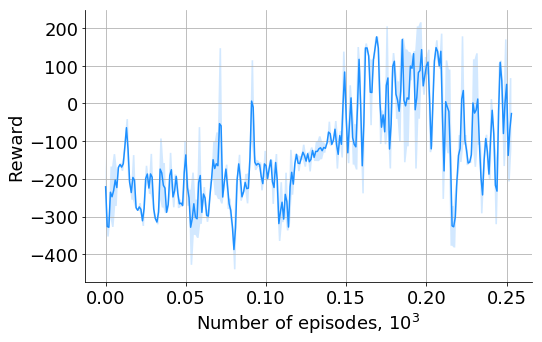

In [105]:
r = np.loadtxt('experiments/lunar_lander/results/sac_test/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=2, x_scale=1000, y_scale=100, save=False)

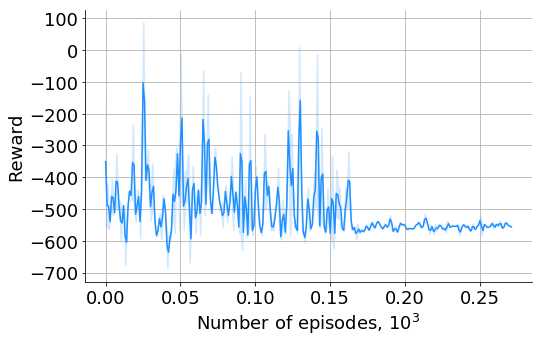

In [126]:
r = np.loadtxt('experiments/prosthetics/results/sac_with_knee/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=2, x_scale=1000, y_scale=1, save=False)

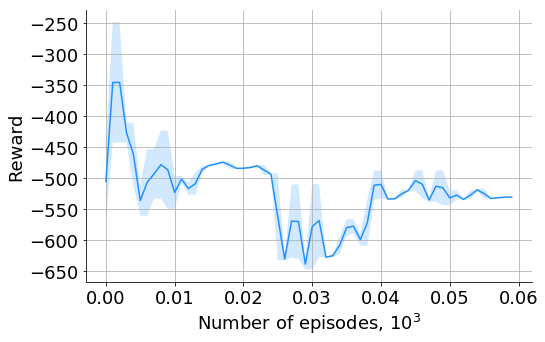

In [109]:
r = np.loadtxt('experiments/prosthetics/results/sac_with_knee/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=2, x_scale=1000, y_scale=1, save=False)

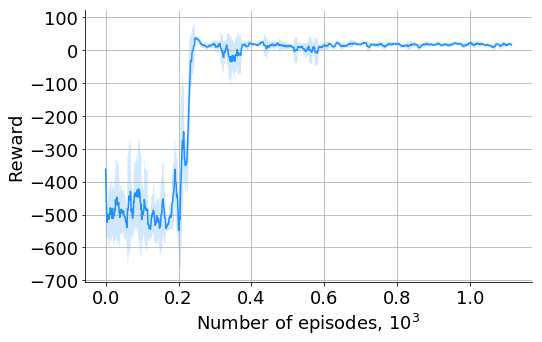

In [114]:
r = np.loadtxt('experiments/prosthetics/results/sac_with_knee/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

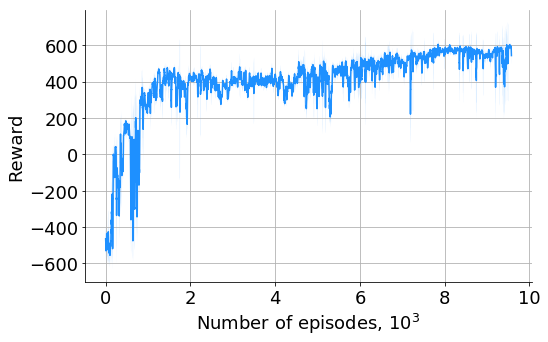

In [225]:
r = np.loadtxt('experiments/prosthetics/results/sac_with_knee/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

In [228]:
import pickle
def load_info():
    with open('experiments/prosthetics/results/sac_with_knee/info.pkl', 'rb') as f:
        return pickle.load(f)

In [229]:
info = load_info()

In [230]:
info

{'algo': 'sac',
 'actor': {'architecture': 'GMM',
  'hiddens': [[128], [128]],
  'activations': ['relu', 'relu'],
  'layer_norm': True,
  'noisy_layer': False,
  'output_activation': 'sigmoid',
  'num_components': 4},
 'critic_v': {'architecture': 'standard',
  'hiddens': [[128], [128]],
  'activations': ['relu', 'relu'],
  'layer_norm': True,
  'noisy_layer': False,
  'output_activation': None,
  'action_insert_block': -1},
 'critic_q': {'architecture': 'standard',
  'hiddens': [[128], [128]],
  'activations': ['relu', 'relu'],
  'layer_norm': True,
  'noisy_layer': False,
  'output_activation': None,
  'action_insert_block': 1},
 'grad_clip': 1.0,
 'discount_factor': 0.99,
 'target_critic_v_update_rate': 0.01,
 'temperature': 0.001,
 'regularization_coef': 0.0}

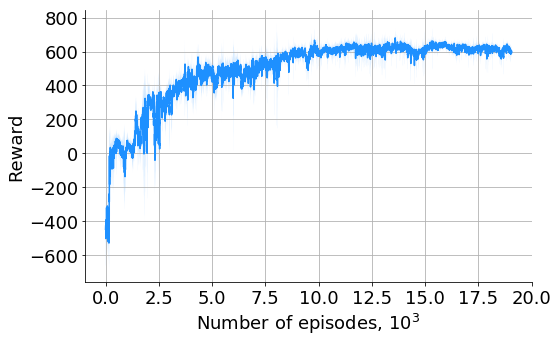

In [438]:
r = np.loadtxt('experiments/prosthetics/results/quantile_walking/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

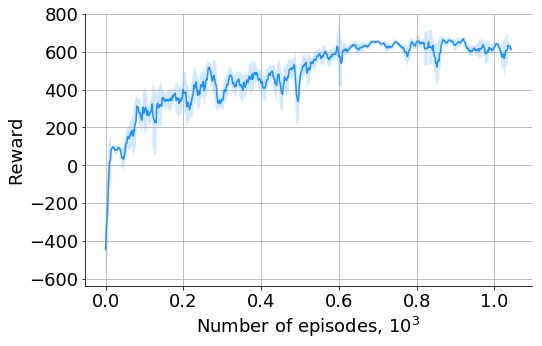

In [439]:
r = np.loadtxt('experiments/prosthetics/results/quantile_walking/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

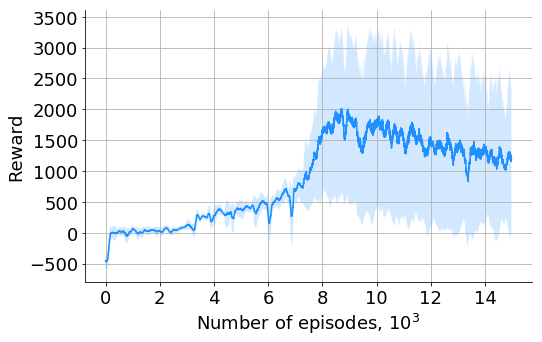

In [469]:
r = np.loadtxt('experiments/prosthetics/results/quantile_walking2/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=100, x_scale=1000, y_scale=1, save=False)

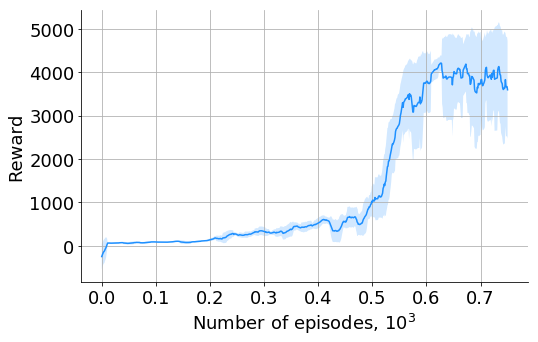

In [470]:
r = np.loadtxt('experiments/prosthetics/results/quantile_walking2/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=20, x_scale=1000, y_scale=1, save=False)

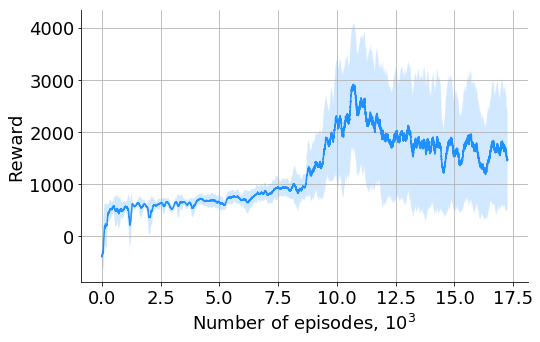

In [65]:
r = np.loadtxt('experiments/prosthetics/results/quantile_walking/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=100, x_scale=1000, y_scale=1, save=False)

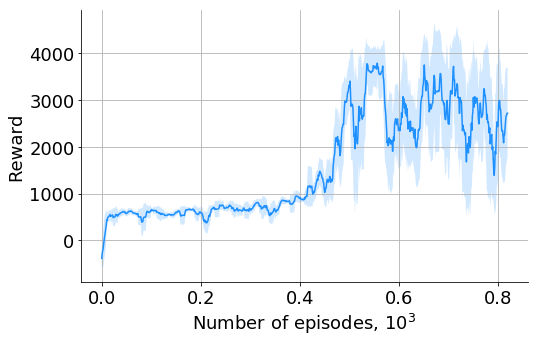

In [66]:
r = np.loadtxt('experiments/prosthetics/results/quantile_walking/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

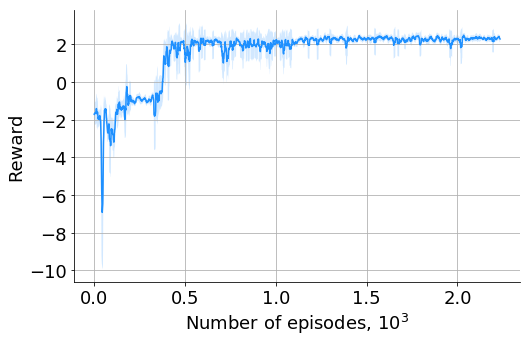

In [18]:
r = np.loadtxt('experiments/lunar_lander/results/td3/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

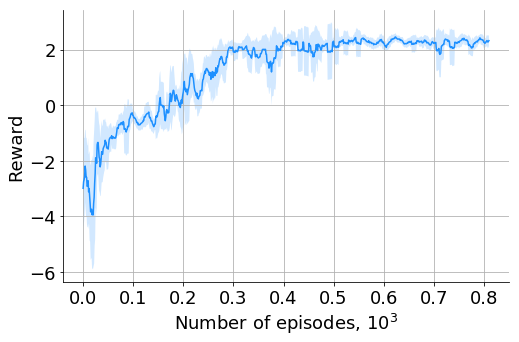

In [44]:
r = np.loadtxt('experiments/lunar_lander/results/sac/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

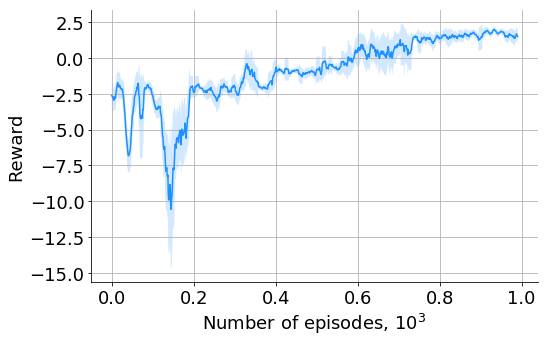

In [55]:
r = np.loadtxt('experiments/lunar_lander/results/qr/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

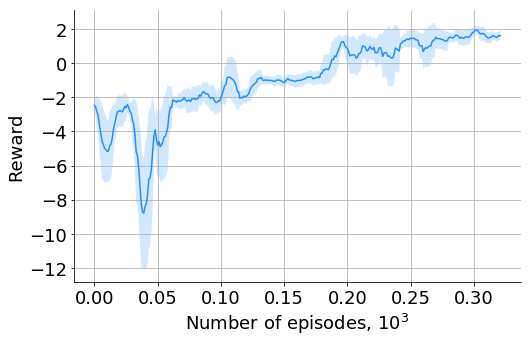

In [56]:
r = np.loadtxt('experiments/lunar_lander/results/qr/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

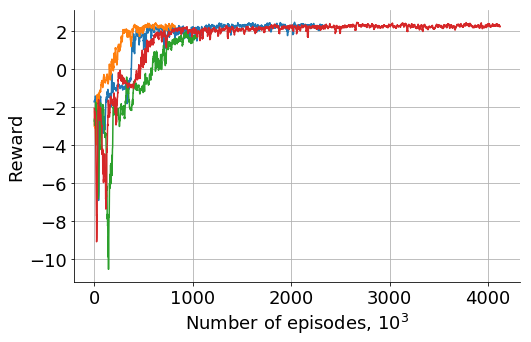

In [73]:
r_td3 = np.loadtxt('experiments/lunar_lander/results/td3/rewards-train.txt')[:,2]
r_sac = np.loadtxt('experiments/lunar_lander/results/sac/rewards-train.txt')[:,2]
r_qr = np.loadtxt('experiments/lunar_lander/results/qr/rewards-train.txt')[:,2]
r_qr2 = np.loadtxt('experiments/lunar_lander/results/qr2/rewards-train.txt')[:,2]
plot_compare([r_td3, r_sac, r_qr, r_qr2], tau=10)

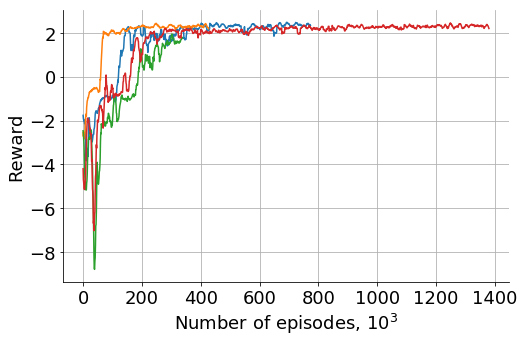

In [74]:
r_td3 = np.loadtxt('experiments/lunar_lander/results/td3/rewards-test.txt')[:,2]
r_sac = np.loadtxt('experiments/lunar_lander/results/sac/rewards-test.txt')[:,2]
r_qr = np.loadtxt('experiments/lunar_lander/results/qr/rewards-test.txt')[:,2]
r_qr2 = np.loadtxt('experiments/lunar_lander/results/qr2/rewards-test.txt')[:,2]
plot_compare([r_td3, r_sac, r_qr, r_qr2], tau=10)

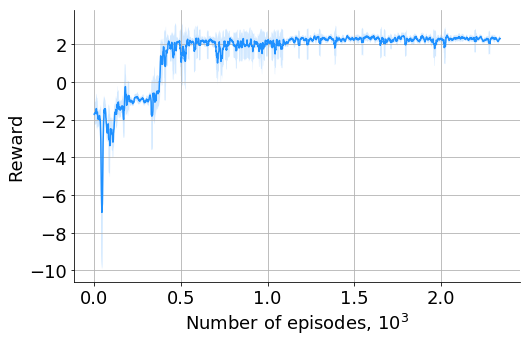

In [75]:
r = np.loadtxt('experiments/lunar_lander/results/td3/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

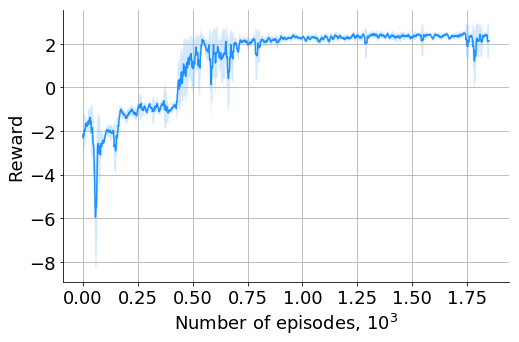

In [77]:
r = np.loadtxt('experiments/lunar_lander/results/-history_len3-frame_skip2-n_step1-batch_size256-async/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

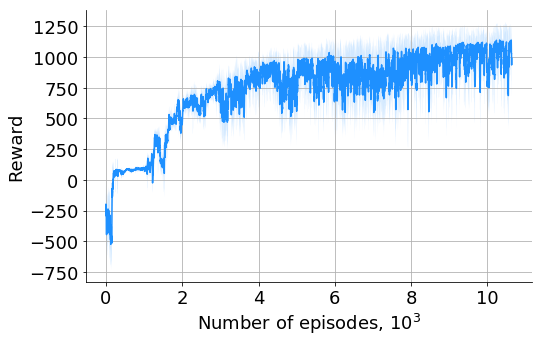

In [219]:
r = np.loadtxt('experiments/prosthetics/results/td3/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

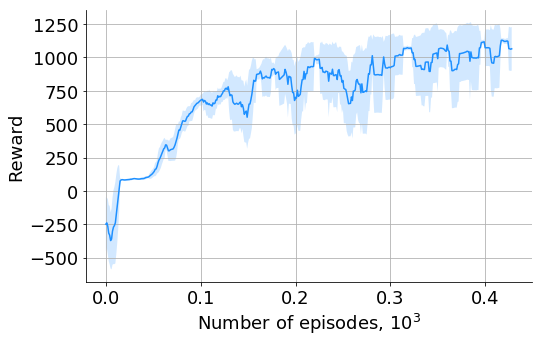

In [220]:
r = np.loadtxt('experiments/prosthetics/results/td3/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

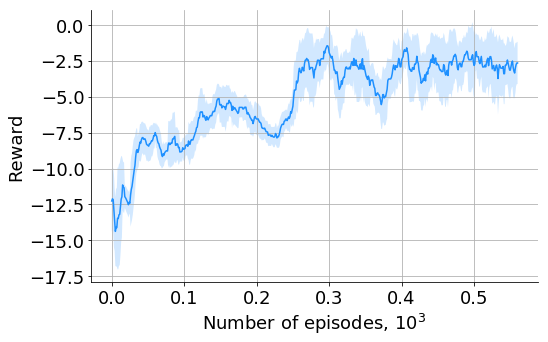

In [121]:
r = np.loadtxt('experiments/pendulum/results/test/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

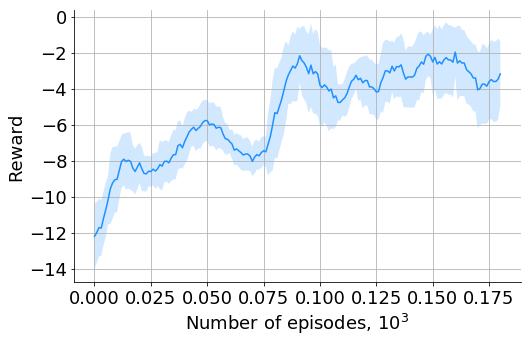

In [122]:
r = np.loadtxt('experiments/pendulum/results/test/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

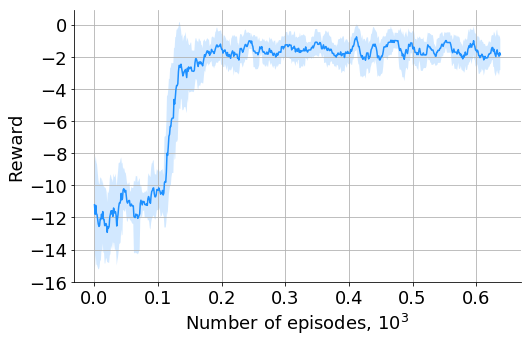

In [149]:
r = np.loadtxt('experiments/pendulum/results/qqtt/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

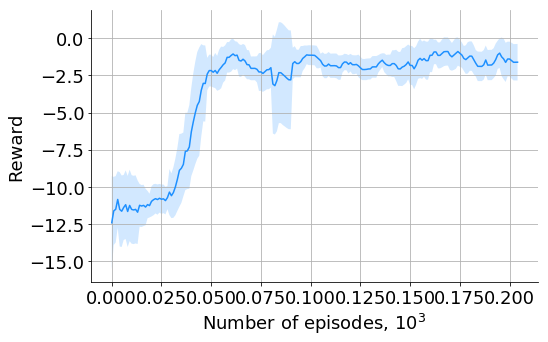

In [145]:
r = np.loadtxt('experiments/pendulum/results/qqtt/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

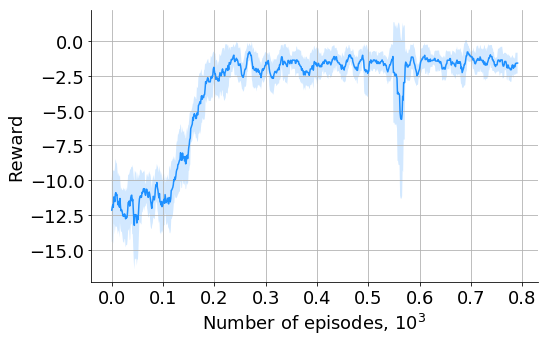

In [157]:
r = np.loadtxt('experiments/pendulum/results/qqtt2/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

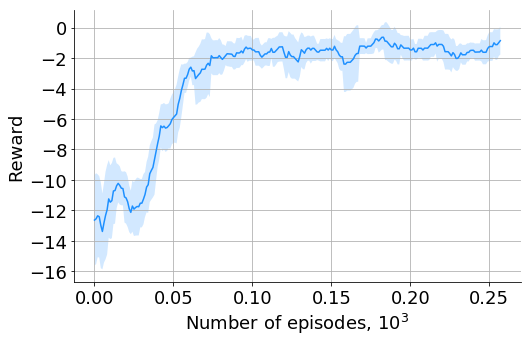

In [156]:
r = np.loadtxt('experiments/pendulum/results/qqtt2/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

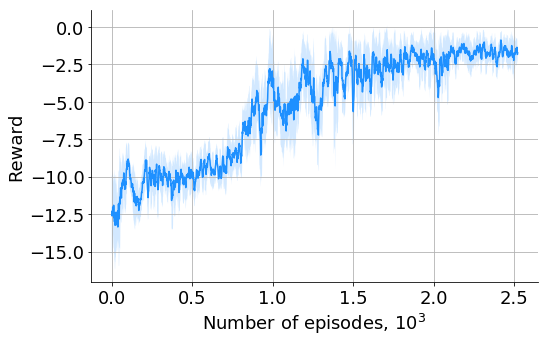

In [197]:
r = np.loadtxt('experiments/pendulum/results/qqtt3/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

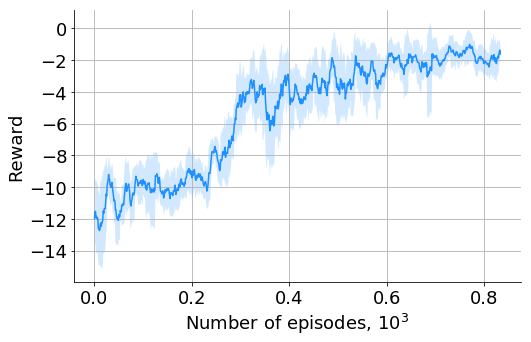

In [196]:
r = np.loadtxt('experiments/pendulum/results/qqtt3/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

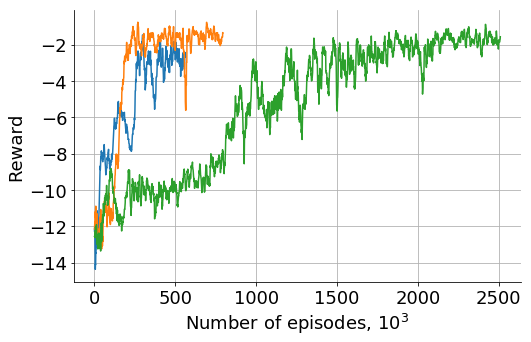

In [195]:
r_ddpg = np.loadtxt('experiments/pendulum/results/test/rewards-train.txt')[:,2]
r_qqtt = np.loadtxt('experiments/pendulum/results/qqtt2/rewards-train.txt')[:,2]
r_qqtt2 = np.loadtxt('experiments/pendulum/results/qqtt3/rewards-train.txt')[:,2]
plot_compare([r_ddpg, r_qqtt, r_qqtt2], tau=10)

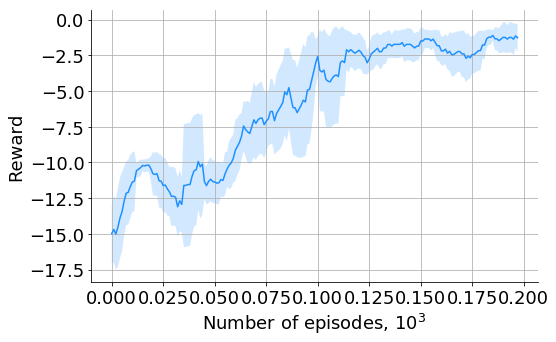

In [199]:
r = np.loadtxt('experiments/pendulum/results/qqtt4/rewards-train.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

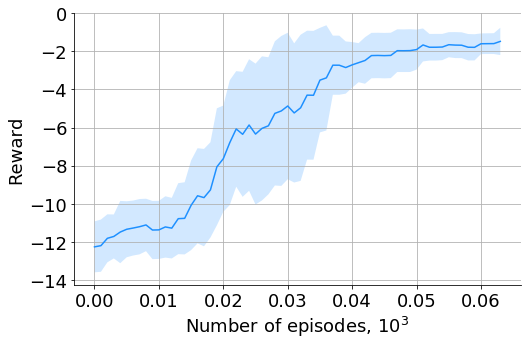

In [200]:
r = np.loadtxt('experiments/pendulum/results/qqtt4/rewards-test.txt')
plot_means_and_stdevs(r[:,2], tau=10, x_scale=1000, y_scale=1, save=False)

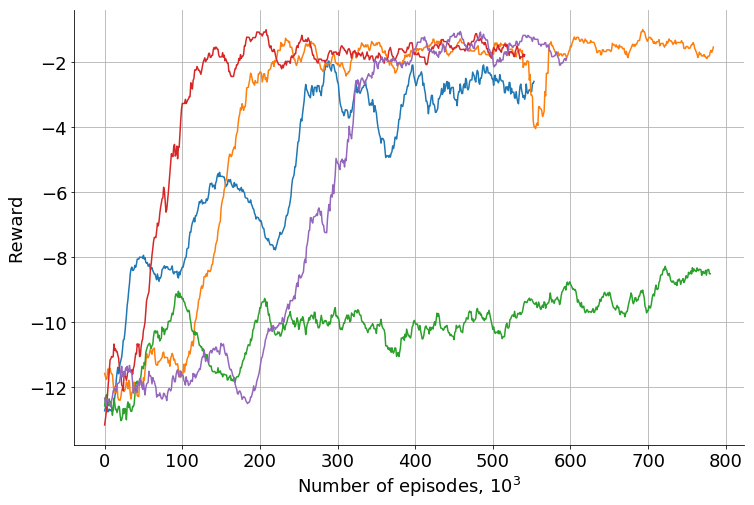

In [216]:
r_ddpg = np.loadtxt('experiments/pendulum/results/test/rewards-train.txt')[:,2]
r_qqtt = np.loadtxt('experiments/pendulum/results/qqtt2/rewards-train.txt')[:,2]
r_qqtt2 = np.loadtxt('experiments/pendulum/results/qqtt3/rewards-train.txt')[:,2][:800]
r_qqtt3 = np.loadtxt('experiments/pendulum/results/qqtt4/rewards-train.txt')[:,2]
r_qqtt4 = np.loadtxt('experiments/pendulum/results/qqtt5/rewards-train.txt')[:,2]
plot_compare([r_ddpg, r_qqtt, r_qqtt2, r_qqtt3, r_qqtt4], figsize=(12, 8), tau=20)